In [1]:

%load_ext autoreload
%autoreload 2
%aimport train
%reload_ext data

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


In [2]:
import train

In [21]:
del trainer

In [3]:
trainer = train.Trainer()

In [4]:
trainer.train()

Instructions for updating:
Use tf.cast instead.
Train on 410 samples, validate on 22 samples
Instructions for updating:
Use tf.cast instead.
410/410 [==============================] - 8s 19ms/sample - loss: 10.8015 - acc: 0.0000e+00 - val_loss: 9.3098 - val_acc: 0.0000e+00


In [5]:
result_mask = trainer.sample_prediction() > 0.95
mask = trainer.adg.masks[-1]

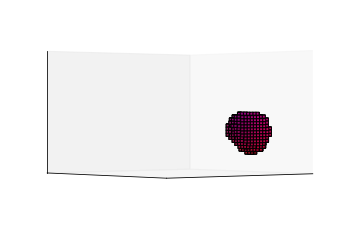

In [6]:


import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x
# prepare some coordinates
x, y, z = np.indices((41,41,41))/40
rc = midpoints(x)
gc = midpoints(y)
bc = midpoints(z)

# combine the objects into a single boolean array
voxels = mask ^ result_mask

colors = np.zeros(voxels.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d',alpha=0.3)
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.voxels(voxels,facecolors=colors,  edgecolor="k",alpha=0.3)
#ax.voxels(result_mask,  edgecolor="k",alpha=0.3)
ax.view_init(elev=0,azim=230)
plt.show()


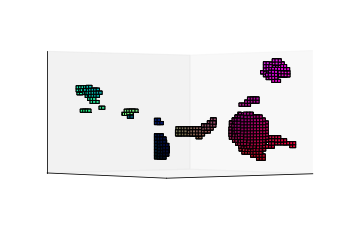

In [7]:


import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x
# prepare some coordinates
x, y, z = np.indices((41,41,41))/40
rc = midpoints(x)
gc = midpoints(y)
bc = midpoints(z)

# combine the objects into a single boolean array
voxels = trainer.adg.images[-1] > 3

colors = np.zeros(voxels.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d',alpha=0.3)
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.voxels(voxels,facecolors=colors,  edgecolor="k",alpha=0.3)
#ax.voxels(result_mask,  edgecolor="k",alpha=0.3)
ax.view_init(elev=0,azim=230)
plt.savefig("plot.png")

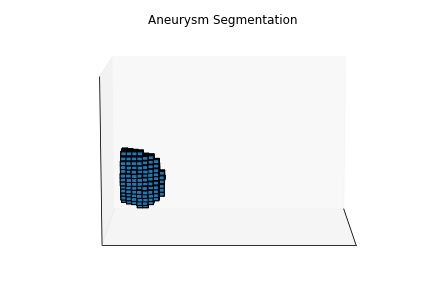

In [19]:

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


frame_count = 100
first_stage=frame_count//2


def update_lines(num, voxelmap):#, dataLines, lines):
    angle = 90/first_stage
    if num == frame_count//1.5:
        del voxelmap
        voxelmap = ax.voxels(result_mask,  edgecolor="k",alpha=0.3, label="Prediction")
    if num <= first_stage:
        ax.view_init(10,num*angle)
    else:
        ax.view_init(min(10+(num-first_stage)*angle,90),angle*first_stage)
    
# Attaching 3D axis to the figure
fig = plt.figure()
ax = Axes3D(fig)

voxelmap = ax.voxels(mask,  edgecolor="k",alpha=0.3, label="Groundtruth")
# Setting the axes properties


ax.set_title('Aneurysm Segmentation')
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, frame_count,fargs={"voxelmap":voxelmap},
                                   interval=200, blit=False)


Writer = animation.writers['ffmpeg']
writer = Writer(fps=15)#, metadata=dict(artist='Me'), bitrate=5500)
line_ani.save("plot.mp4", writer=writer, dpi=200)

In [17]:
type(voxelmap)

dict

In [1]:
import os

In [2]:
os.makedirs("plots",exist_ok=True)

In [2]:
import preprocessing, config, numpy as np

In [3]:
ad = preprocessing.AneurysmData(config.patch40_data_path)

In [14]:
ratio = list()
for mask_path in ad.paths_mask:
    mask = np.load(mask_path)
    ratio.append(np.sum(mask)/np.prod(mask.shape))

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'positive pixels / all pixels')

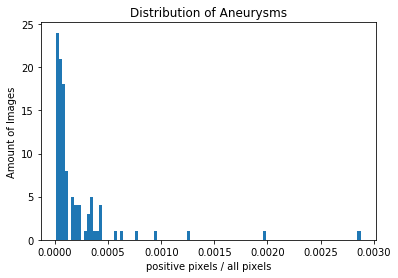

In [56]:
plt.hist(ratio,bins=100)
plt.title("Distribution of Aneurysms")
plt.savefig("distribution.svg")
plt.ylabel("Amount of Images")
plt.xlabel("positive pixels / all pixels")

In [4]:
import postprocessing
image = np.load(ad.paths_image[0])
mask = np.load(ad.paths_mask[0])


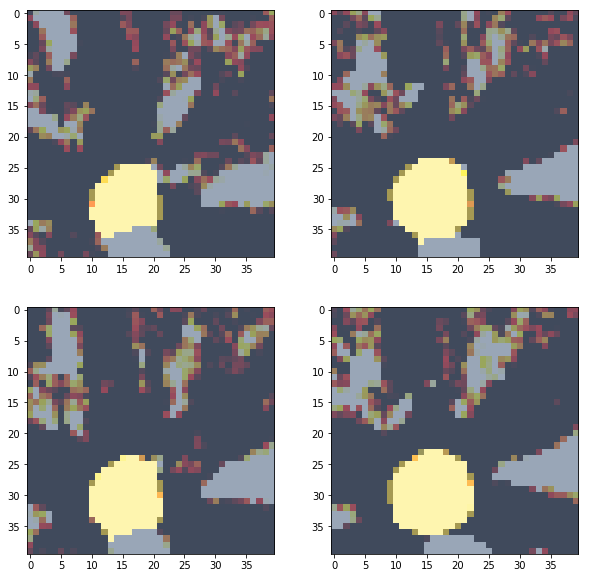

<Figure size 16000x16000 with 0 Axes>

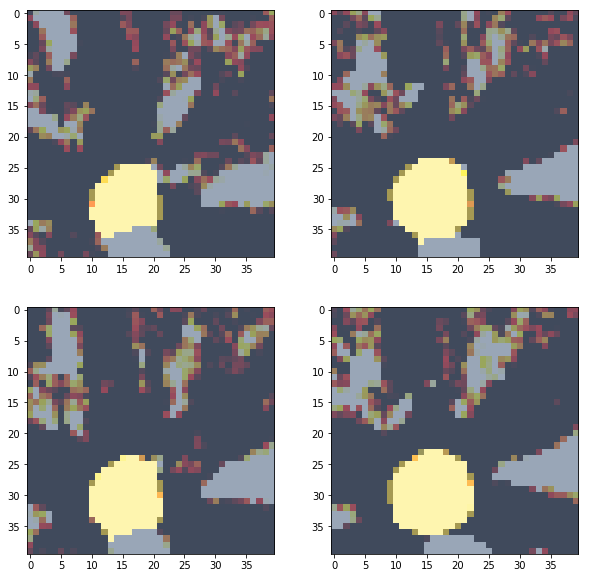

In [22]:
plot_overlap(image,mask, start=12)

In [21]:
from matplotlib import pyplot as plt

def plot_overlap(target_mask, predicted_mask, start = 10):
    import matplotlib.pyplot as plt
    N=2
    image = target_mask
    mask = predicted_mask > 0.65
    plt.figure(dpi=800)
    plt.rcParams['figure.figsize'] = [10,10]
    fig, ax = plt.subplots(nrows=N, ncols=N)
    for i in range(N):
        for j in range(N):
            im = image[i+j*N+start,:,:]
            m = mask[i+j*N+start,:,:]
            ax[i,j].imshow(im,alpha=0.6,cmap="hot",vmin=0,vmax=1)
            ax[i,j].imshow(m,alpha=0.4, cmap="cividis",vmin=0,vmax=1)
    return fig

In [ ]:
    
    def plot_result4D(self, num=-1):
        result_mask, mask = self.sample_prediction()
        
        x, y, z = np.indices(np.array(mask.shape)+1)/config.shape[0]
        rc = self.midpoints(x)
        gc = self.midpoints(y)
        bc = self.midpoints(z)


        colors = np.zeros(mask.shape + (4,))
        colors[..., 0] = rc
        colors[..., 1] = gc
        colors[..., 2] = bc
        colors[..., 3] = 0.4

        frame_count = 100
        first_stage=frame_count//1.8


        def update_lines(num):#, dataLines, lines):
            rotation = 180 # degrees
            angle = rotation/first_stage
            if num == frame_count//1.5:
                voxelmap = ax.voxels(mask, facecolors=1-colors, edgecolor=None, label="Prediction")
            if num <= first_stage:
                ax.view_init(10,num*angle)
            else:
                ax.view_init(min(10+(num-first_stage)*angle,90),angle*first_stage)

        # Attaching 3D axis to the figure
        fig = plt.figure()
        ax = Axes3D(fig)

        voxelmap = ax.voxels(result_mask, facecolors=colors, edgecolor=None,alpha=0.3, label="Groundtruth")
        # Setting the axes properties


        ax.set_title('Aneurysm Segmentation')
        ax.grid(False)

        # Hide axes ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        # Creating the Animation object
        line_ani = animation.FuncAnimation(fig, update_lines, frame_count,#fargs={"voxelmap":voxelmap},
                                           interval=200, blit=False)


        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=15)#, metadata=dict(artist='Me'), bitrate=5500)
        
        line_ani.save("plots/plot{}.mp4".format(num), writer=writer, dpi=200)

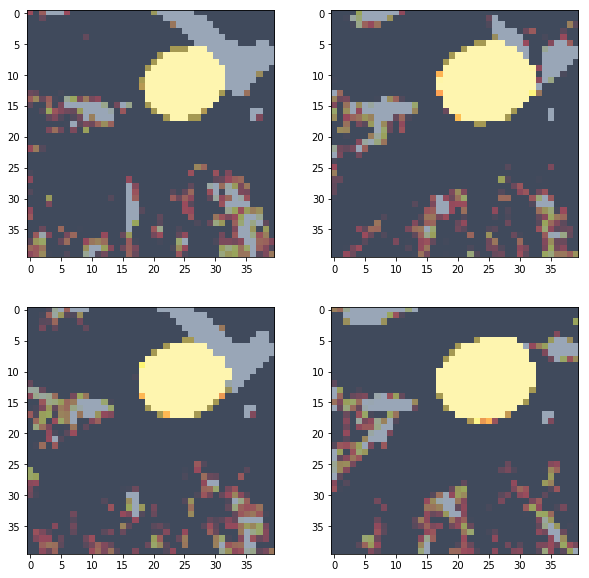

<Figure size 8000x8000 with 0 Axes>

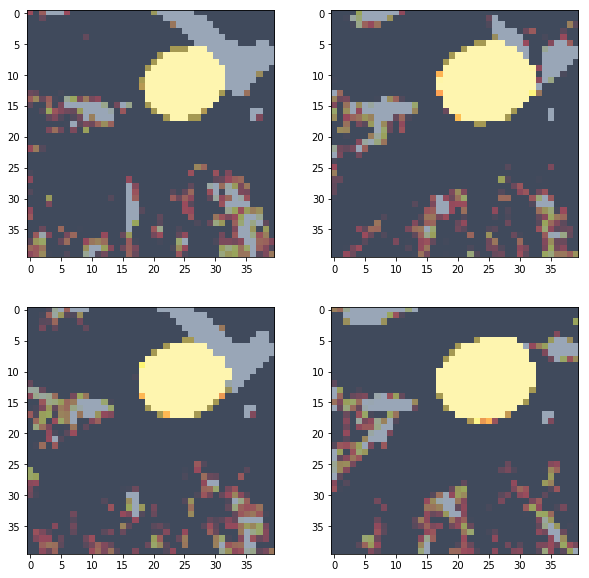

In [23]:
plot_overlap(np.flip(image),np.flip(mask), start=12)

In [15]:
np.flip(np.eye(10),axis=1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])